In [84]:
import numpy as np
from matplotlib import  pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

In [95]:
np.set_printoptions(suppress=True)

#已知10位同学看过电影的评分，0表示没有看过
USER_SCRORE=np.array(
    [
        [1, 0, 0, 1, 2, 4],
        [0, 2, 3, 0, 4, 0],
        [3, 3, 0, 4, 0, 4],
        [2, 4, 5, 0, 1, 1],
        [1, 0, 5, 0, 5, 0],
        [4, 3, 4, 0, 0, 2],
        [1, 0, 3, 4, 0, 4],
        [1, 0, 3, 4, 1, 4],
        [5, 1, 3, 2, 0, 4],
        [1, 0, 3, 4, 2, 0]
    ]
)

#已知K同学的看过的电影的评分，0表示没有看过
K=np.array([4, 0, 0, 3, 2, 0])

#余弦相识度
def cos_similar(A,B):
    inner_product= float(A*B.T)
    norm_product= np.linalg.norm(A)*np.linalg.norm(B)
    return float(inner_product/norm_product)




In [114]:
#进行奇异值分解
U,S,VT=np.linalg.svd(USER_SCRORE)
print(U.shape)
print(S)
print(VT.shape)

(10, 10)
[16.11611832  8.81979644  6.4660193   3.95544318  3.48409335  2.62451489]
(6, 6)


In [116]:
#取奇异值个数为3，保留原矩阵76%的信息
retention = sum(S[:3])/sum(S)
print(S.shape)
print(retention)

(6,)
0.7572938082893775


In [109]:
#截断奇异值分解结果
U = U[:,0:3]
S = np.diag(S[:3])
VT=VT[0:3,:].T
print(U.shape)
print(S)
print(VT.shape)

(10, 3)
[[16.11611832  0.          0.        ]
 [ 0.          8.81979644  0.        ]
 [ 0.          0.          6.4660193 ]]
(6, 3)


[[6.]
 [7.]
 [0.]]
the recommend movie is  [2, 5]


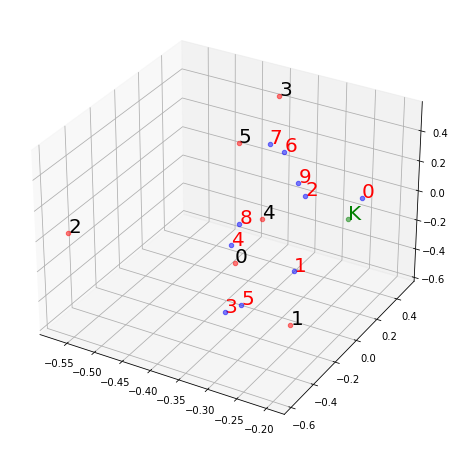

In [94]:

#可视化U,VT
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(111,projection='3d')

#用户特征矩阵
for m in range(U.shape[0]):
    ax.scatter(U[m,0],U[m,1],U[m,2], color='blue', alpha=0.5)
    ax.text(U[m,0],U[m,1],U[m,2], '%s' % (str(m)), size=20, zorder=1,color='r')


#电影特征举证
for m in range(VT.shape[0]):
    ax.scatter(VT[m,0],VT[m,1],VT[m,2], color='red', alpha=0.5)
    ax.text(VT[m,0],VT[m,1],VT[m,2], '%s' % (str(m)), size=20, zorder=1,color='k')


#计算K同学的位置
K = np.mat(K)

K_P= K*VT*(np.mat(S).I)
m=0
ax.scatter(K_P[m,0],K_P[m,1],K_P[m,2], color='green', alpha=0.5)
ax.text(K_P[m,0],K_P[m,1],K_P[m,2], 'K', size=20, zorder=1,color='g')
#plt.show()


#计算K同学与每个用户的相识度
paris=[]
for i in range(U.shape[0]):
    similar_rate = cos_similar(K_P,np.array([U[i,:]]))
    #print i+1,'similar is ',similar_rate
    paris.append([similar_rate,i])
#paris = np.mat(paris)

#找到相似用户，按相似度从小到大排序
paris.sort(key=lambda x: x[0],reverse=True)
paris = np.mat(paris) 

#取前三个相似用户
paris = paris[0:3,1]
K = K.A
K = K[0,:]
print(paris)

#找到相似用户看过的而K用户没有看过的电影
result=[]
for i in range(paris.shape[0]):
    index = int(paris[i,0])
    similar_user_movies = USER_SCRORE[index,:]
    for j in range(len(similar_user_movies)):
        user_movie = similar_user_movies[j]
        if user_movie>0  and K[j]==0:
            result.append(j)

result = list(set(result))

#输出最终推荐结果
print ('the recommend movie is ',result)

